# Módulo random   

***

Este cuaderno plantea cómo *adivinar* un **número entero** perteneciente a un rango de valores previamente conocido. Una forma **óptima**, es decir, utilizando **en promedio** el menor número de intentos, se basa en utilizar el **método de bisección**, también conocido como **búsqueda binaria** o **búsqueda dicotómica**.

## Adivinar un número entero pensado por el usuario

Es el caso que nos ocupa si lo que se trata es de adivinar un número entero perteneciente a un rango de valores, por ejemplo entre $0$ y $1000000$. Así, podemos asimilar que nuestra lista está formada por la secuencia ordenada $[0, 1, 2,  ..., 999999, 1000000]$.

La idea del programa es que este calculará mediante el **algoritmo de búsqueda binaria** un valor entero, lo mostrará al usuario y le *preguntará* si el número que ha *pensado* es superior, inferior o igual. Si el programa ha acertado, finalizará el programa. En caso contrario, dependiendo de la respuesta del usuario, recalculará un nuevo valor.

Inicialmente, para simplificar el problema se propone limitar los valores entre un **valor mínimo**, `VALOR_MINIMO=0` y un **valor máximo**, `VALOR_MAXIMO=1000000`. Al ser valores constantes prefijados, seguimos la regla de estilo de usar las variables correspondientes con letras mayúsculas.

Dado que el número de elementos de nuestra lista es $1000001$ y el primer entero que cumple $2^{n}>1000001$ es $20$, sabemos que el programa debe ser capaz de *adivinar* el número en como mucho $20$ intentos si usa la búsqueda binaria. Es el número de intentos que realizará el programa para la implementación mostrada si el usuario *piensa* el valor `1`.

In [2]:
import math

VALOR_MINIMO = 0
VALOR_MAXIMO = 1000000

# math.ceil(x) devuelve el entero por exceso de x
num_intentos = math.ceil(math.log2(VALOR_MAXIMO - VALOR_MINIMO + 1))

print(num_intentos)

20


El usuario pulsará en cada caso las teclas `>`, `<` o `=` para *guiar* al programa.

In [ ]:
# Adivinar un número pensado por el usuario. Versión 1.
import math

VALOR_MINIMO = 0
VALOR_MAXIMO = 1000000

num_intentos = math.ceil(math.log2(VALOR_MAXIMO - VALOR_MINIMO + 1))

print('Piense un número entero entre {} y {}.'.format(VALOR_MINIMO, VALOR_MAXIMO))
print('Si no me engañas lo adivinaré como mucho en {} intentos.'.format(num_intentos))

inf = VALOR_MINIMO
sup = VALOR_MAXIMO

encontrado = False
contador = 0
while inf <= sup and not encontrado:
    contador += 1
    num = (inf+sup)//2  # División entera
    print("\n¿Es el {}?".format(num))
    print("Si es mayor pulsa >\nSi es menor pulsa <\nSi he acertado pulsa =")
    respuesta = input()

    if respuesta == '<':
        sup = num - 1
    elif respuesta == '>':
        inf = num + 1
    elif respuesta == '=':
        encontrado = True
        
if encontrado:
    print("He acertado en {} intentos.".format(contador))
else:
    print('¡Me has engañado, bribón!')  

Nótese que si la salida del bucle se debe a que se cumple `inf > sup`, el programa puede deducir sin error que ha sido *engañado* por el usuario.

### Detectando respuestas inválidas

El programa anterior tiene márgen de mejora. ¿Qué pasa si por error el usuario introduce un carácter que no es ni `<`, ni `>` ni `=`?

En la variante mostrada a continuación, se almacenan en una lista `caracteres_validos` los caracteres válidos. Mediante un bucle *infinito*, se *obliga* al usuario a introducir un carácter válido.

In [14]:
# Adivinar un número pensado por el usuario. Versión 2.
# Se detecta si el usuario no introduce los caracteres validos <, > o =.
import math

VALOR_MINIMO = 0
VALOR_MAXIMO = 1000000

num_intentos = math.ceil(math.log2(VALOR_MAXIMO - VALOR_MINIMO + 1))

print('Piense un número entero entre {} y {}.'.format(VALOR_MINIMO, VALOR_MAXIMO))
print('Si no me engañas lo adivinaré como mucho en {} intentos.'.format(num_intentos))

inf = VALOR_MINIMO
sup = VALOR_MAXIMO

encontrado = False
contador = 0
caracteres_validos = ['<','>','=']
while inf <= sup and not encontrado:
    contador += 1
    num = (inf+sup)//2  # División entera
   
    while True:  # Bucle "infinito" a la espera de una respuesta válida
        print("\n¿Es el {}?".format(num))
        print("\nSi es mayor pulsa >\nSi es menor pulsa <\nSi he acertado pulsa =")
        respuesta = input()
        if respuesta in caracteres_validos:
            if respuesta == '<':
                sup = num - 1
            elif respuesta == '>':
                inf = num + 1
            else:
                encontrado = True
            break
        else:
            print('Tu respuesta no es válida.')
        
if encontrado:
    print("He acertado en {} intentos.".format(contador))
else:
    print('¡Me has engañado, bribón!')  

Piense un número entero entre 0 y 1000000.
Si no me engañas lo adivinaré como mucho en 20 intentos.

¿Es el 500000?

Si es mayor pulsa >
Si es menor pulsa <
Si he acertado pulsa =
=
He acertado en 1 intentos.


Esta variante que acabamos de ver es un ejemplo del enfoque de **manejo de excepciones** denominado **Piensa antes de actuar**. 

Vamos a ir un paso mas allá incorporando para **manejar** los errores del usuario nuevos elementos:
1. **Encapsular** la respuesta dentro de una función, que llamaremos `respuesta_usuario()`.
2. Manejar una respuesta errónea del usuario en la función con el enfoque  **Piensa antes de actuar**.
2. Manejar una respuesta errónea del usuario **levantando** una **excepción** del tipo `ValueError`, enfoque **Es más sencillo pedir perdón que pedir permiso**.

No documentaremos las siguientes funciones para no hacer demasiado prolijas las celdas.

In [ ]:
def respuesta_usuario_v1(num):  # Enfoque "Piensa antes de actuar"
    caracteres_validos = ['<','>','=']
    while True:  # Bucle "infinito" a la espera de una respuesta válida
        print("\n¿Es el {}?".format(num))
        print("Si es mayor pulsa >\nSi es menor pulsa <\nSi he acertado pulsa =")
        
        respuesta = input()
        if respuesta in caracteres_validos:
            return respuesta
        else:
            print('El carácter {} no está en la siguiente lista: {}.'.format(respuesta, caracteres_validos))


def respuesta_usuario_v2(num): # Enfoque "Es más sencillo pedir perdón que pedir permiso"
    caracteres_validos = ['<','>','=']
    while True:  # Bucle "infinito" a la espera de una respuesta válida
        print("\n¿Es el {}?".format(num))
        print("Si es mayor pulsa >\nSi es menor pulsa <\nSi he acertado pulsa =")
        
        respuesta = input()
        if respuesta in caracteres_validos:
            return respuesta
        try:
            raise ValueError('El carácter {} no está en la siguiente lista: {}.'.format(respuesta, caracteres_validos))
        except ValueError as error:
            print(error)
    

# Líneas de prueba
respuesta = respuesta_usuario_v1(5)
print('Has respondido con el carácter {}.'.format(respuesta))

respuesta = respuesta_usuario_v2(10)
print('Has respondido con el carácter {}.'.format(respuesta))

Al manejarse la excepción por completo dentro de la función `respuesta_usuario_v2()` no aporta realmente ninguna ventaja respecto a la versión *tradicional*. Por ello, incorporaremos esta última versión al programa.

In [15]:
# Adivinar un número pensado por el usuario. Versión 3.
# La respuesta del usuario se hace a través de una función con gestión de errores.

import math

def respuesta_usuario(num):  # Enfoque "Piensa antes de actuar"
    caracteres_validos = ['<','>','=']
    while True:  # Bucle "infinito" a la espera de una respuesta válida
        print("\n¿Es el {}?".format(num))
        print("Si es mayor pulsa >\nSi es menor pulsa <\nSi he acertado pulsa =")
        
        respuesta = input()
        if respuesta in caracteres_validos:
            return respuesta
        else:
            print('El carácter {} no está en la siguiente lista: {}.'.format(respuesta, caracteres_validos))


VALOR_MINIMO = 0
VALOR_MAXIMO = 1000000

num_intentos = math.ceil(math.log2(VALOR_MAXIMO - VALOR_MINIMO + 1))

print('Piense un número entero entre {} y {}.'.format(VALOR_MINIMO, VALOR_MAXIMO))
print('Si no me engañas lo adivinaré como mucho en {} intentos.'.format(num_intentos))

inf = VALOR_MINIMO
sup = VALOR_MAXIMO

encontrado = False
contador = 0
while inf <= sup and not encontrado:
    contador += 1
    num = (inf+sup)//2  # División entera
   
    respuesta = respuesta_usuario(num)
    if respuesta == '<':
        sup = num - 1
    elif respuesta == '>':
        inf = num + 1
    else:
        encontrado = True
        
if encontrado:
    print("He acertado en {} intentos.".format(contador))
else:
    print('¡Me has engañado, bribón!')  

Piense un número entero entre 0 y 1000000.
Si no me engañas lo adivinaré como mucho en 20 intentos.

¿Es el 500000?
Si es mayor pulsa >
Si es menor pulsa <
Si he acertado pulsa =
=
He acertado en 1 intentos.


### Flexibilizando el rango de valores

No hay ninguna razón por la que nuestro programa no pueda trabajar con un rango de valores enteros libremente elegido por el usuario.

Al igual que en la versión anterior recogíamos la respuesta del usuario en una función, vamos a encapsular también ahora la introducción de los valores del rango mediante una función llamada `introduce_rango()`, que devolverá la tupla `(inf, sup)`. Esta función exigirá que el valor inferior del rango introducido por el usuario sea menor que el superior. Por supuesto, si el usuario no introduce un valor entero válido, también capturará esa excepción.

De nuevo, incorporamos en el siguiente fragmento una línea que nos permite probar la función para diferentes valores de entrada.

In [21]:
def introduce_rango():
    print('Introduzca el rango de valores enteros al que pertenece el número que debe adivinar el programa.')
    while True:
        try:
            inf = int(input('Valor inferior del rango:'))
            sup = int(input('Valor superior del rango:'))
            if inf >= sup:
                raise ValueError('No se cumple {}<{}.'.format(inf, sup))
        except ValueError as error:
            print(error)
        else:
            break
    return inf, sup


print(introduce_rango())

Introduzca el rango de valores enteros al que pertenece el número que debe adivinar el programa.
Valor inferior del rango:3
Valor superior del rango:3
No se cumple 3<3.
Valor inferior del rango:3
Valor superior del rango:4
(3, 4)


A continuación, mostramos el programa con nuestra nueva función incorporada.

In [16]:
# Adivinar un número pensado por el usuario. Versión 4.
# La respuesta del usuario se hace a través de una función con gestión de errores.
# El usuario puede elegir el rango de valores al que pertenece el número que debe adivinar el programa.

import math

def introduce_rango():
    print('Introduzca el rango de valores enteros al que pertenece el número que debe adivinar el programa.')
    while True:
        try:
            inf = int(input('Valor inferior del rango:'))
            sup = int(input('Valor superior del rango:'))
            if inf >= sup:
                raise ValueError('No se cumple {}<{}.'.format(inf, sup))
        except ValueError as error:
            print(error)
        else:
            break
    return inf, sup


def respuesta_usuario(num):  # Enfoque "Piensa antes de actuar"
    caracteres_validos = ['<','>','=']
    while True:  # Bucle "infinito" a la espera de una respuesta válida
        print("\n¿Es el {}?".format(num))
        print("Si es mayor pulsa >\nSi es menor pulsa <\nSi he acertado pulsa =")
        
        respuesta = input()
        if respuesta in caracteres_validos:
            return respuesta
        else:
            print('El carácter {} no está en la siguiente lista: {}.'.format(respuesta, caracteres_validos))


inf, sup = introduce_rango()  # La función devuelve una tupla

num_intentos = math.ceil(math.log2(sup-inf+1))
print('Si no me engañas lo adivinaré como mucho en {} intentos.'.format(num_intentos))

encontrado = False
contador = 0
while inf <= sup and not encontrado:
    contador += 1
    num = (inf+sup)//2  # División entera
   
    respuesta = respuesta_usuario(num)
    if respuesta == '<':
        sup = num - 1
    elif respuesta == '>':
        inf = num + 1
    else:
        encontrado = True
        
if encontrado:
    print("He acertado en {} intentos.".format(contador))
else:
    print('¡Me has engañado, bribón!')  

Introduzca el rango de valores enteros al que pertenece el número que debe adivinar el programa.
Valor inferior del rango:0
Valor superior del rango:1000000
Si no me engañas lo adivinaré como mucho en 20 intentos.

¿Es el 500000?
Si es mayor pulsa >
Si es menor pulsa <
Si he acertado pulsa =
=
He acertado en 1 intentos.


## Generador de números aleatorios

Vamos a cambiar la perspectiva del problema de tal forma que el número entero sea *pensado* por el ordenador y sea el usuario quien deba adivinarlo. 

Para ello, el programa escogerá un número de forma **aleatoria**.

Un **generador de números aleatorios** (**random number generator**) es un programa que genera una secuencia aleatoria, en principio, de forma impredecible.

Su uso es fundamental en aplicaciones de juegos de ordenador, plataformas de apuestas en línea, criptografía y en otras muchas aplicaciones de orden científico para simular o tomar decisiones de forma aleatoria.

En realidad, la mayor parte de los generadores de números aleatorios son, en realidad, **pseudoaleatorios**: a partir de un valor inicial, la **semilla** (**seed**), generan una secuencia $\{rnd1, rnd2, rnd3, ...\}$ que es **¡siempre la misma!**

### La semilla
Variando la semilla podemos hacer que la secuencia cambie de una ejecución a otra de nuestro programa. De hecho, los generadores aleatorios sofisticados permiten inicializar la semilla de forma cuidadosa porque, no en vano, debemos evitar que un posible **intruso** (**hacker**), analizando varios elementos de la secuencia, adivine la semilla inicial y sea capaz de reproducir, es decir, predecir, los siguientes valores generados. Esto sería inadmisible en una aplicación web de póquer o de cifrado de mensajes, por ejemplo.

Sin embargo, poder usar repetidamente la misma semilla es también una importante característica, ya que permite reproducir cuantas veces sea necesario el mismo experimento y, por ejemplo, depurar un posible error detectado.

### Generador de aleatorios en Python
Python usa por defecto el generador de pseudoaleatorios [Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_Twister), uno de los más utilizados en diferentes lenguajes de programación para aplicaciones científicas. Sin embargo, es totalmente inapropiado para una aplicación de tipo criptográfico. En general, dada la sofisticación de estos generadores, el análisis de los detalles de implementación de estos algoritmos requiere profundos conocimientos matemáticos. 

Si no se elige explícitamente una semilla, Python utilizará típicamente la hora del propio ordenador. En concreto, los milisegundos transcurridos desde la medianoche UTC del 1 de enero de 1970 hasta el momento *actual* en el que se ejecuta el código. Esta **marca temporal** (**epoch**) se conoce como **UNIX epoch**. Para muchas de las aplicaciones de interés científico, es una elección más que suficiente.

Empezar a usar [valores aleatorios en Python](https://docs.python.org/3/library/random.html) es muy simple, importando el módulo estándar `random`.

In [9]:
import random
print(random.random())

0.050423565947078086


Cada vez que ejecutamos el fragmento anterior, obtenemos diferentes valores. Son valores reales en el intervalo semiabierto $[0,1)$. Estadísticamente, la secuencia de estos valores conforman una **distribución uniforme**, es decir, tienen la misma probabilidad de ser generados.

Los valores son diferentes porque, cada vez que ejecutamos el fragmento, Python elige internamente una semilla diferente, al ser el tiempo transcurrido desde el **UNIX epoch** diferente. Sin embargo, si elegimos una semilla inicial, usando `random.seed(semilla)`, obtenemos siempre la misma secuencia. Veámoslo generando una lista de 10 valores aleatorios y ejecutando varias veces la celda.

In [6]:
import random

lista = []
semilla = 23  # Cambia este valor para comprobar que la lista cambia a su vez
random.seed(semilla)  # Comenta esta línea si quieres que la lista cambie cada vez que se ejecute la celda
for i in range(10):
    lista.append(random.random())
    
print(lista)

[0.9248652516259452, 0.9486057779931771, 0.8924333440485793, 0.08355067683068362, 0.5920272268857353, 0.4237474082349614, 0.5300880101180064, 0.13030294124748054, 0.1919971575392927, 0.444573573873013]


#### Valores reales distribuidos uniformemente dentro de un rango
Si queremos obtener valores aleatorios de forma uniforme en un intervalo $[inf,sup]$ tenemos el método `uniform(inf, sup)`, que devuelve un real $x$ en el intervalo $inf \leq x \leq sup$.

In [ ]:
lista = []
inf = -10.5
sup = 20.8
for i in range(10):
    lista.append(random.uniform(inf, sup))
    
print(lista)

El siguiente ejemplo muestra como generar una **nube** de puntos aleatorios en 2D. En concreto, $500$ puntos en el cuadrado formado por los vértices $\{-100,-100\}$ y $\{100,100\}$.

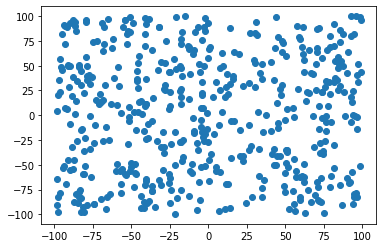

In [9]:
import matplotlib.pyplot as plt

inf = -100
sup = 100
num_puntos = 500
x = [0]*num_puntos
y = [0]*num_puntos
for i in range(num_puntos):
    x[i] = random.uniform(inf, sup)
    y[i] = random.uniform(inf, sup)
    
plt.scatter(x,y)

#### Valores enteros distribuidos uniformemente dentro de un rango
Para generar valores enteros uniformemente distribuidos en un rango de valores puede usarse el método `randint(inf, sup)`, que devuelve un entero $x$ en el intervalo $inf \leq x \leq sup$.

In [10]:
inf = -10
sup = 6
lista = []
for i in range(10):
    lista.append(random.randint(inf, sup))
    
print(lista)

[-9, -4, -8, -3, -10, 1, -8, -2, -3, 3]


## Adivinar un número entero *pensado* por el ordenador
En este caso, es el usuario el que deberá calcular *a mano* (o con ayuda de otro programa en paralelo) la secuencia de valores que permitirá en el menor número promedio posible de intentos adivinar el número.

El programa tendrá las siguientes características:
1. El usuario fijará un rango inicial de valores enteros. Basta reutilizar la función `introduce_rango()`.
2. El programa avisará del número de intentos disponibles.
3. Mediante un bucle solicitará al usuario la introducción del valor, indicando en el caso de que no se haya acertado si el valor a adivinar es inferior o superior. Si se acierta o se sobrepasa el número de intentos el bucle finalizará.
4. Mostrar un mensaje indicando si se ha acertado o no y el número de intentos empleado. 

In [23]:
# Adivinar un número pensado por el ordenador. Versión 1.
# El usuario elige el rango de valores al que pertenece el número que debe adivinar el programa.

import math
import random

def introduce_rango():
    print('Introduzca el rango de valores enteros al que pertenece el número que debe adivinar el programa.')
    while True:
        try:
            inf = int(input('Valor inferior del rango:'))
            sup = int(input('Valor superior del rango:'))
            if inf >= sup:
                raise ValueError('No se cumple {}<{}.'.format(inf, sup))
        except ValueError as error:
            print(error)
        else:
            break
    return inf, sup


inf, sup = introduce_rango()  # La función devuelve una tupla

num_intentos_max = math.ceil(math.log2(sup-inf+1))
print('Te daré {} oportunidades para acertar.'.format(num_intentos_max))

valor_a_adivinar = random.randint(inf,sup)
# print(valor_a_adivinar)  #Por si se quiere visualizar el valor "pensado" por el ordenador

contador = 0
exito = False
while contador < num_intentos_max and not exito:
    contador += 1
    valor = int(input('Valor:'))
    if valor < valor_a_adivinar:
        print('Debes probar con un valor superior.')
    elif valor > valor_a_adivinar:
        print('Debes probar con un valor inferior.')
    else:
        exito = True
        
if exito:
    print('Has acertado en {} intentos.'.format(contador))
else:
    print('¡Torpe! Consumiste los {} intentos disponibles.'.format(num_intentos_max))
    print('El número que tenías que adivinar es el {}.'.format(valor_a_adivinar))

Introduzca el rango de valores enteros al que pertenece el número que debe adivinar el programa.
Valor inferior del rango:1
Valor superior del rango:3
Te daré 2 oportunidades para acertar.
Valor:2
Debes probar con un valor superior.
Valor:3
Has acertado en 2 intentos.


Una pequeña mejora del programa viene de la mano de manejar la posibilidad de que el usuario introduzca un valor no entero por error. Para ello, usamos una función `introduce_valor()` que exigirá que el valor introducido sea válido y dentro del rango de valores inicial.

In [ ]:
def introduce_valor(inf, sup):
    while True:
        print('Introduzca un valor dentro del rango de valores enteros [{},{}]'.format(inf, sup))
        try:
            valor = int(input('Valor:'))
            if inf > valor or sup < valor:
                raise ValueError('El valor introducido no pertenece al rango [{},{}]'.format(inf, sup))
        except ValueError as error:
            print(error)
        else:
            break
    return valor


print(introduce_valor(0, 100))

In [15]:
# Adivinar un número pensado por el ordenador. Versión 2.
# El usuario elige el rango de valores al que pertenece el número que debe adivinar el programa.
# El usuario introduce el valor a través de una función con manejo de excepciones.

import math
import random

def introduce_rango():
    print('Introduzca el rango de valores enteros al que pertenece el número que debe adivinar el programa.')
    while True:
        try:
            inf = int(input('Valor inferior del rango:'))
            sup = int(input('Valor superior del rango:'))
            if inf >= sup:
                raise ValueError('No se cumple {}<{}.'.format(inf, sup))
        except ValueError as error:
            print(error)
        else:
            break
    return inf, sup


def introduce_valor(inf, sup):
    while True:
        print('Introduzca un valor dentro del rango de valores enteros [{},{}]'.format(inf, sup))
        try:
            valor = int(input('Valor:'))
            if inf > valor or sup < valor:
                raise ValueError('El valor introducido no pertenece al rango [{},{}]'.format(inf, sup))
        except ValueError as error:
            print(error)
        else:
            break
    return valor


inf, sup = introduce_rango()  # La función devuelve una tupla

num_intentos_max = int(math.log2(sup-inf+1)+1)
print('Te daré {} oportunidades para acertar.'.format(num_intentos_max))

valor_a_adivinar = random.randint(inf,sup)
# print(valor_a_adivinar)  #Por si se quiere visualizar el valor "pensado" por el ordenador

contador = 0
exito = False
while contador < num_intentos_max and not exito:
    contador += 1
    valor = introduce_valor(inf, sup)
    if valor < valor_a_adivinar:
        print('Debes probar con un valor superior.')
    elif valor > valor_a_adivinar:
        print('Debes probar con un valor inferior.')
    else:
        exito = True
        
if exito:
    print('Has acertado en {} intentos.'.format(contador))
else:
    print('¡Torpe! Consumiste los {} intentos disponibles.'.format(num_intentos_max))

Introduzca el rango de valores enteros al que pertenece el número que debe adivinar el programa.
Valor inferior del rango:0
Valor superior del rango:5
Te daré 3 oportunidades para acertar.
Introduzca un valor dentro del rango de valores enteros [0,5]
Valor:1
Debes probar con un valor superior.
Introduzca un valor dentro del rango de valores enteros [0,5]
Valor:1
Debes probar con un valor superior.
Introduzca un valor dentro del rango de valores enteros [0,5]
Valor:1
Debes probar con un valor superior.
¡Torpe! Consumiste los 3 intentos disponibles.
